# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [4]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [5]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400. But only 398 complete observations.

#### Question 2. Create a summary table

In [4]:
df_raw.describe()
 

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: The spread of GRE scores is much greater than the spread of GPAs. 

#### Question 4. Drop data points with missing data


In [6]:
df_missingna = df_raw.dropna()
df_missingna [:5]

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [7]:
df_missingna.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: You can run the describe function again. This time there are no NaN values in the summary meaning the NaN values have been removed

#### Question 6. Create box plots for GRE and GPA

In [8]:
#boxplot 1
gre_table = df_missingna['gre']
gre_table [:3]

0    380.0
1    660.0
2    800.0
Name: gre, dtype: float64

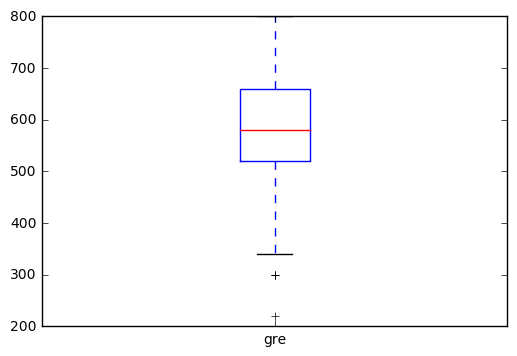

In [9]:
df_gre = pd.DataFrame(gre_table)
df_gre.plot(kind='box')

In [10]:
#boxplot 2 
gpa_table = df_missingna['gpa']
gpa_table [:3]

0    3.61
1    3.67
2    4.00
Name: gpa, dtype: float64

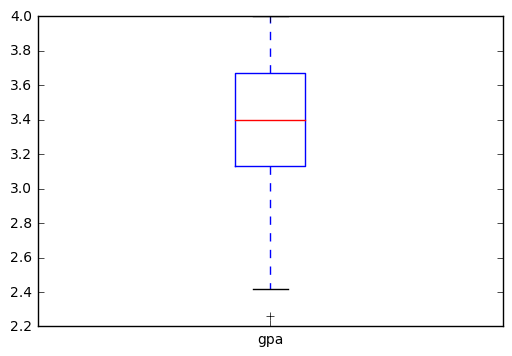

In [11]:
df_gpa = pd.DataFrame(gpa_table)
df_gpa.plot(kind='box')

#### Question 7. What do these plots show?

Answer: These plots show the min and max values in the dataset, the mean, and the inner and outer quartiles. Since we are looking at two different sets of data, it's hard to compare them, but the gre plot looks like it has a larger spread (the whiskers are further apart). 

#### Question 8. Describe each distribution 

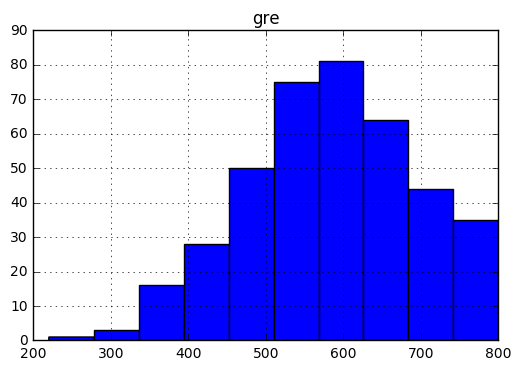

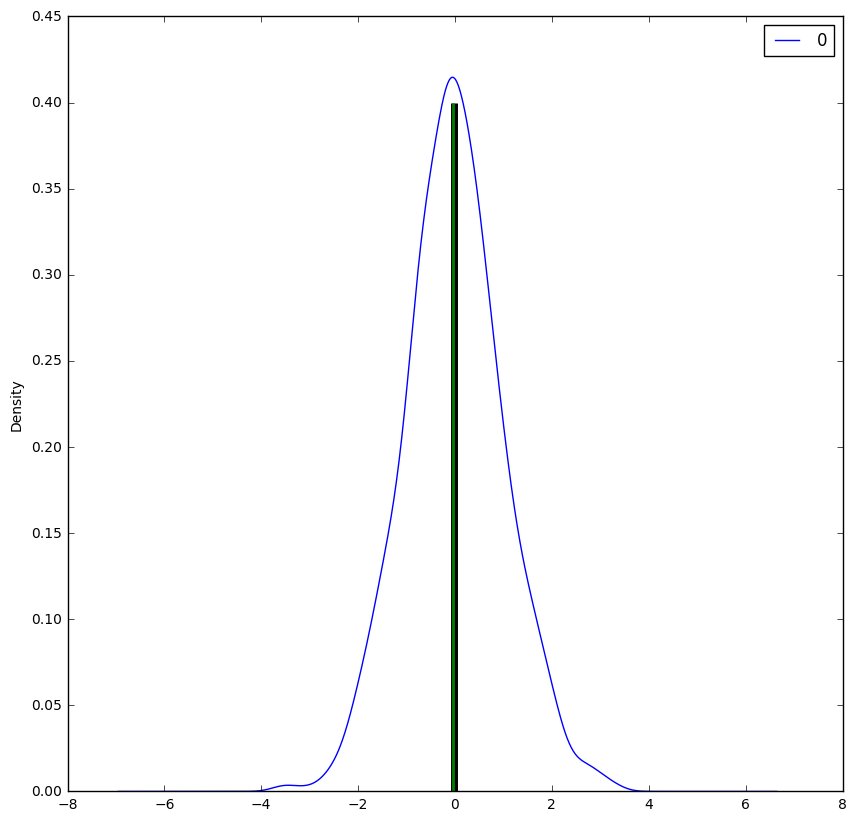

In [12]:
#gre histogram
df_gre.hist()

# plot the distribution of each variable 
#gre 
df_gre = pd.DataFrame(np.random.normal(size=1000))

df_gre.plot(kind="density",
              figsize=(10,10))


plt.vlines(df_gre.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(df_gre.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="green")

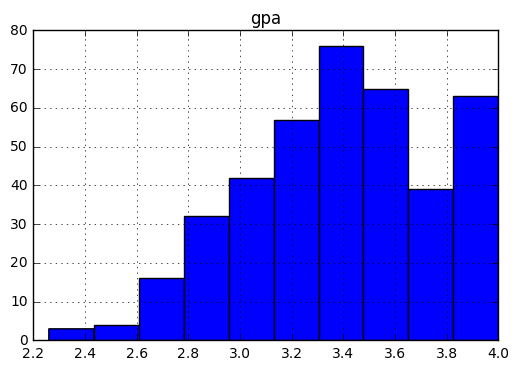

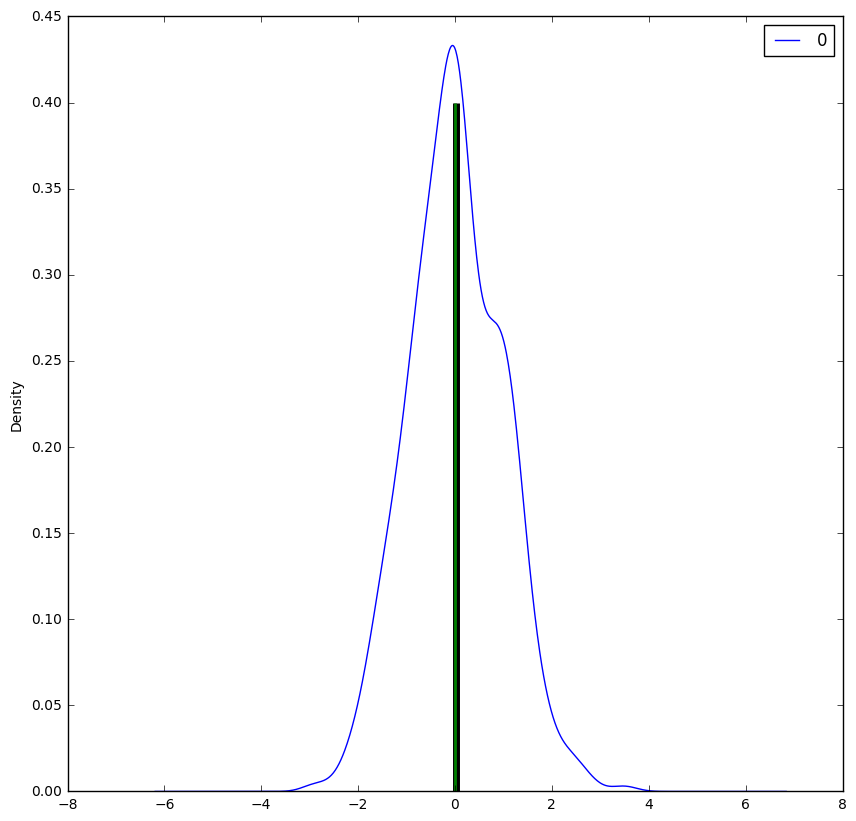

In [13]:
#gpa histogram
df_gpa.hist()


#gpa
df_gpa = pd.DataFrame(np.random.normal(size=1000))

df_gpa.plot(kind="density",
              figsize=(10,10))


plt.vlines(df_gpa.mean(),     # Plot black line at mean
           ymin=0, 
           ymax=0.4,
           linewidth=5.0)

plt.vlines(df_gpa.median(),   # Plot red line at median
           ymin=0, 
           ymax=0.4, 
           linewidth=2.0,
           color="green")

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: No. The mean and median are exactly the same in both distributions, so it could be viewed as normal. There is no skewness, or kurtosis, but both distributions are peaked. So these are peaked distributions, resulting in a smaller std. 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

#### Question 11. Which of our variables are potentially colinear? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1168b6a90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x117e35ed0>]], dtype=object)

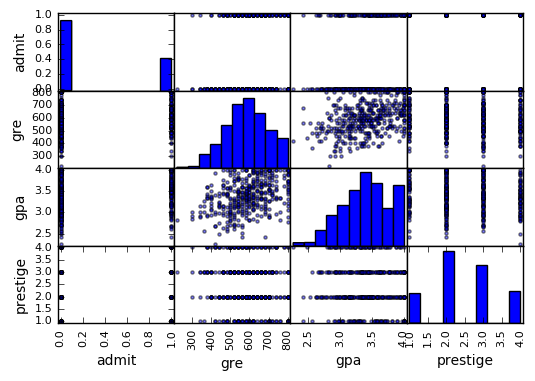

In [15]:
from pandas.tools import plotting
plotting.scatter_matrix(df_missingna)

             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000
Axes(0.125,0.125;0.62x0.775)


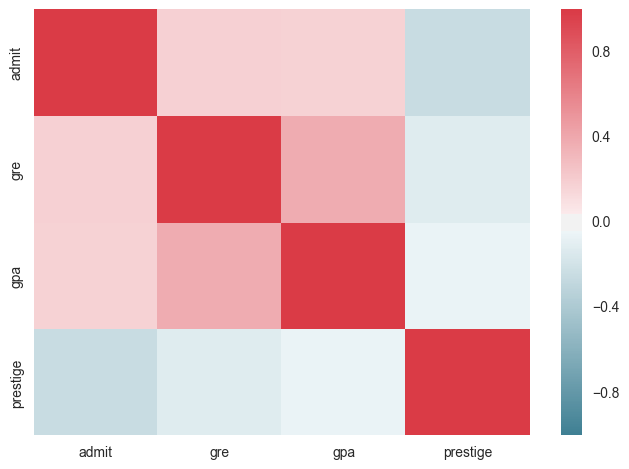

In [16]:
# create a correlation matrix for the data
import seaborn as sns

cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = df_missingna[['admit', 'gre', 'gpa', 'prestige']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Question 12. What did you find?

Answer: You can see that the 4 variables are positively correlated, by looking at the diagonal line that runs from the top left to bottom right. It is also symmetrical. 

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: To determine the assocation between grad school admission rates and prestige of undergraduate schools, my next step would be to build a regression analysis to see how the data points line up, and what the R-sqaured value is using a OLS Regression.  

#### Question 14. What is your hypothesis? 

Answer: From the models we have run thus far, it is clear that admit is positively correlated with the prestige variable. My hypothesis is if prestige is ranked 3 or 4, then the admit rate will always be 1 (admit = yes).

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data